In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
import pycircstat as crc
%matplotlib inline
sns.set_style('ticks')

In [44]:
files = list(filter(lambda v:".csv" in v,os.listdir()))

In [45]:
data = np.loadtxt(files[0],delimiter=',')

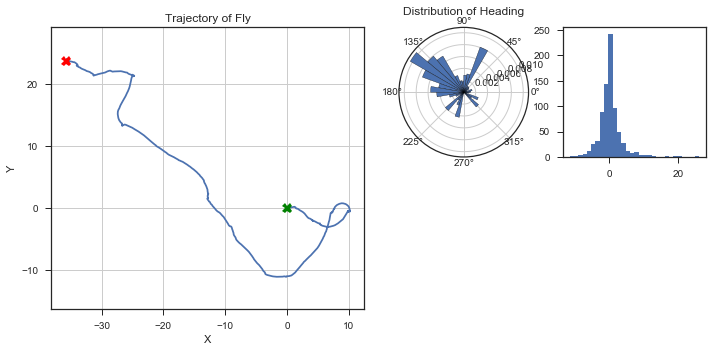

ValueError: max() arg is an empty sequence

In [153]:
def plotTraj(data):
    plt.figure(1,figsize=(10,5))
    ax = plt.subplot2grid((2,4),(0,0),rowspan=2,colspan=2)
    ax.set_aspect('equal', 'datalim')
    plt.plot(data[:,3]-data[0,3],data[:,4]-data[0,4])
    plt.plot(0,0,'gX',markersize=10)
    plt.plot(data[-1,3]-data[0,3],data[-1,4]-data[0,4],'rX',markersize=10)
    plt.xlabel("X")
    plt.ylabel("Y")
    ax.grid(True,which='major')
    plt.title("Trajectory of Fly")
    
    
    bin_size = 10
    a,b = np.histogram(data[:,1], bins=np.arange(0, 360+bin_size, bin_size),normed=True)
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
    ax = plt.subplot2grid((2,4),(0,2),projection='polar')
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, edgecolor='k')
    #ax.scatter(data[::10,1],0.015*np.ones(data[::10,1].shape))
    ax.set_theta_zero_location("E")
    plt.title("Distribution of Heading")
    
    ax = plt.subplot2grid((2,4),(0,3))
    angle_diff = ( data[1:,1] - data[:-1,1] + 360+180 ) % 360 - 180
    plt.hist(angle_diff,bins=30)
    plt.show()
    
plotTraj(data)

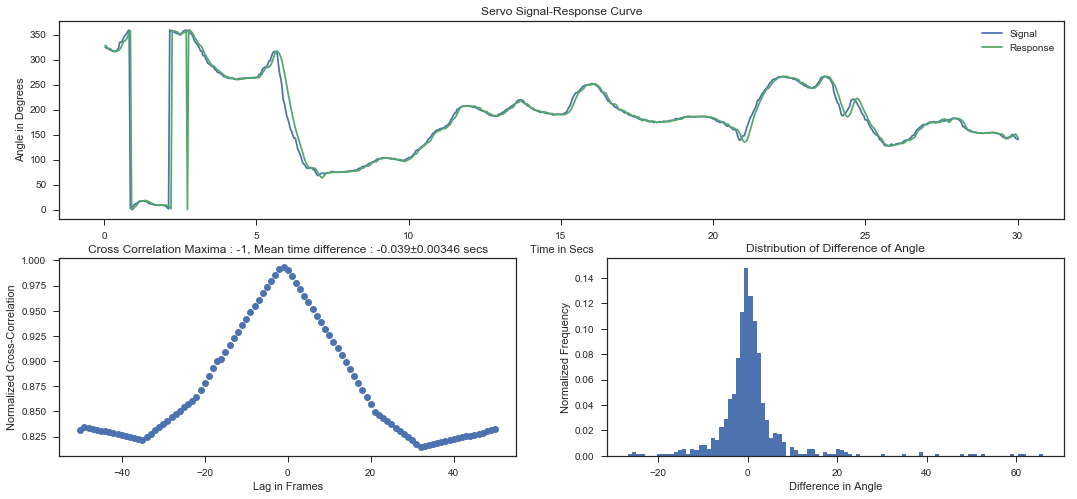

In [48]:
def traj_quality(data):
    plt.figure(1,figsize=(18,8))
    gridspec.GridSpec(2,2)

    time = data[:,0]
    heading = (360-data[:,1]-32)%360
    position = data[:,2]%360

    plt.subplot2grid((2,2), (0,0), colspan=2, rowspan=1)
    plt.plot(time,heading,label="Signal")
    plt.plot(time,position,label="Response")
    plt.title("Servo Signal-Response Curve")
    plt.xlabel("Time in Secs")
    plt.ylabel("Angle in Degrees")
    plt.legend()

    plt.subplot2grid((2,2), (1,0))
    lags,vals,_,_ = plt.xcorr(heading,position,maxlags=50,usevlines=False)
    xcorr_max = lags[np.argmax(vals)]
    plt.title("Cross Correlation Maxima : {}, Mean time difference : {:0.03}Â±{:0.03} secs".format(xcorr_max,np.diff(time).mean()*xcorr_max,np.diff(time).std()*abs(xcorr_max)))
    plt.xlabel("Lag in Frames")
    plt.ylabel("Normalized Cross-Correlation")

    plt.subplot2grid((2,2), (1,1))
    angle_diff = ( position - heading + 360+180 ) % 360 - 180
    # angle_diff = 180 - abs(abs(heading - eq_position) - 180)
    plt.hist(angle_diff,bins=100,normed=True)
    plt.title("Distribution of Difference of Angle")
    plt.xlabel("Difference in Angle")
    plt.ylabel("Normalized Frequency")

    plt.show()
traj_quality(data)

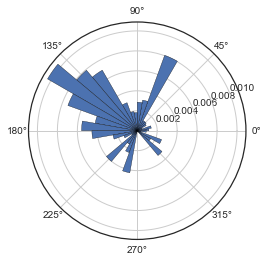

In [74]:
centers.shape

(18,)

In [75]:
a.shape

(10,)

In [66]:
a

array([ 31,  88,  69, 185, 170,  63,  80,  17,  30,  38], dtype=int64)

In [67]:
b

array([  3.251 ,  38.9219,  74.5928, 110.2637, 145.9346, 181.6055,
       217.2764, 252.9473, 288.6182, 324.2891, 359.96  ])

In [98]:
x = data[:,3]-data[0,3]
y = data[:,4]-data[0,4]

hed= (360+np.arctan2((y[1:]-y[:-1]),(x[1:]-x[:-1]))*180/np.pi)%360

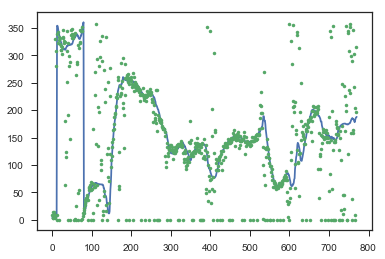

In [102]:
plt.plot(data[:,1])
plt.plot(hed,'.')

In [148]:
head = data[:,1]
crc.mean(head/180*np.pi,ci=0.95)

(2.459045601868747,
 confidence_interval(lower=2.34990042314774, upper=2.568190780589754))

In [144]:
data

array([[ 3.00000e-02,  3.25100e+00, -3.20000e+01,  3.49160e+01,
        -1.44750e+01],
       [ 7.00000e-02,  5.40400e+00, -3.30000e+01,  3.50700e+01,
        -1.44520e+01],
       [ 1.10000e-01,  5.88200e+00, -3.70000e+01,  3.52760e+01,
        -1.44370e+01],
       ...,
       [ 2.99500e+01,  1.85888e+02, -2.10000e+02, -7.29000e-01,
         9.44900e+00],
       [ 2.99820e+01,  1.86676e+02, -2.13000e+02, -7.18000e-01,
         9.43800e+00],
       [ 3.00220e+01,  1.87695e+02, -2.17000e+02, -9.28000e-01,
         9.37300e+00]])